In [1]:
import math
import warnings

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.cross_decomposition import PLSRegression

%matplotlib inline
sns.set_style('white')

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

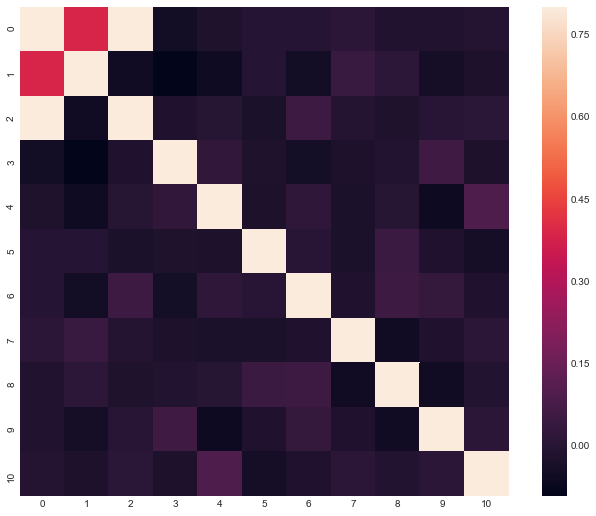

In [2]:
# Number of datapoints in outcome.
n = 1000

# Number of features.
p = 10

# Create random normally distributed data for parameters.
X = np.random.normal(size=n * p).reshape((n, p))

# Create normally distributed outcome related to parameters but with noise.
y = X[:, 0] + 2 * X[:, 1] + np.random.normal(size=n * 1) + 5



# Check out correlations. First column is the outcome.
f, ax = plt.subplots(figsize=(12, 9))
corrmat = pd.DataFrame(np.insert(X, 0, y, axis=1)).corr()

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

R-squared regression: 0.829199793981
R-squared PLSR: 0.829199610237


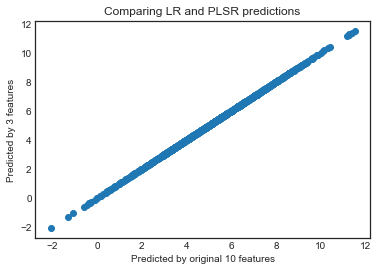

In [3]:
# Fit a linear model with all 10 features.
regr = linear_model.LinearRegression()
regr.fit(X, y)

# Save predicted values.
Y_pred = regr.predict(X)
print('R-squared regression:', regr.score(X, y))

# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 3 dimensions.
pls1 = PLSRegression(n_components=3)

# Reduce X to R(X) and regress on y.
pls1.fit(X, y)

# Save predicted values.
Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR:', pls1.score(X, y))

# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 3 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

In [5]:
# Your PLSR models here.
pls2 = PLSRegression(n_components=5)
pls3 = PLSRegression(n_components=7)
pls4 = PLSRegression(n_components=8)
# Reduce X to R(X) and regress on y.
pls1.fit(X, y)
pls2.fit(X, y)
pls3.fit(X, y)
pls4.fit(X, y)
# Save predicted values.
Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR = 3:', pls1.score(X, y))
print('R-squared PLSR = 5:', pls2.score(X, y))
print('R-squared PLSR = 6:', pls3.score(X, y))
print('R-squared PLSR = 8:', pls4.score(X, y))

R-squared PLSR = 3: 0.829199610237
R-squared PLSR = 5: 0.829199793978
R-squared PLSR = 6: 0.829199793981
R-squared PLSR = 8: 0.829199793981


# Gradient descent


Coefficients from sklearn: 
 [[ 1.9871327]]

Intercept from sklearn: 
 [ 0.49565465]

Coefficients from gradient descent algorithm: 
 1.987035904

Intercept from gradient descent algorithm: 
 0.49565796507


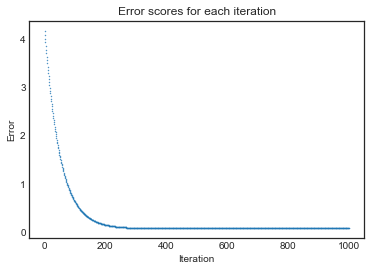

In [6]:
## Cost function for the linear regression that we will try to optimize.
def LR_cost_function (alpha, beta, x, y):
    '''Return the cost for a given line and data.
    
    Alpha and beta are the coeficients that describe the fit line line, while
    x and y are lists or arrays with the x and y value of each data point.
    '''
    error = 0
    n = len(x)
    for i in range(n):
        point_error = (y[i] - (alpha + beta * x[i])) ** 2
        error += point_error
    return error / n


# Function we'll call each iteration (or step) of the gradient algorithm.
def step (alpha_cur, beta_cur, learning_rate, x, y):
    '''Move downhill from a current cost function to a new, more optimal one.'''
    alpha = 0
    beta = 0
    n = len(x)
    for i in range(n):
        # Partial derivative of the intercept.
        point_alpha = -(2 / n) * (y[i] - ((alpha_cur + beta_cur * x[i])))
        alpha += point_alpha
        
        # Partial derivative of the slope.
        point_beta = -(2 / n) * x[i] * (y[i] - ((alpha_cur + beta_cur * x[i])))
        beta += point_beta
        
    new_alpha = alpha_cur - learning_rate * alpha 
    new_beta = beta_cur - learning_rate * beta
    return [new_alpha, new_beta]

# These constants correspond to the decision-points described above.
# How many steps to take.
stop = 1000

# How far to move with each step.
learning_rate = .005

# Starting values for intercept and slope 
alpha_start = 0
beta_start = 0

# Time to make some data!
x = np.random.normal(0, 1, 100)
y = x * 2 + np.random.sample(100)

# Fit an true minimum regression using solved equations.
regr = linear_model.LinearRegression()
regr.fit(x.reshape(-1, 1), y.reshape(-1, 1))

print('\nCoefficients from sklearn: \n', regr.coef_)
print('\nIntercept from sklearn: \n', regr.intercept_)


# Now fit an iteratively optimized regression using your custom gradient
# descent algorithm.

# Storing each iteration to inspect later.
all_error=[]

# Provide starting values.
alpha = alpha_start
beta = beta_start

#Run the algorithm.
for iter in range(stop):
    
    # Take a step, assigning the results of our step function to feed into
    # the next step.
    alpha, beta = step(alpha, beta, learning_rate, x, y)
    
    # Calculate the error.
    error = LR_cost_function(alpha, beta, x, y)
    
    # Store the error to instpect later.
    all_error.append(error)

    
print('\nCoefficients from gradient descent algorithm: \n', beta)
print('\nIntercept from gradient descent algorithm: \n', alpha)

plt.plot(all_error, 'o', ms=.4)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Error scores for each iteration')
plt.show()


Coefficients from sklearn: 
 [[ 1.96982882]]

Intercept from sklearn: 
 [ 0.51203808]

Coefficients from gradient descent algorithm: 
 1.72660876795

Intercept from gradient descent algorithm: 
 0.473030909523


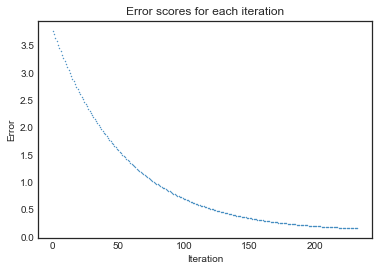

233


In [33]:
## Cost function for the linear regression that we will try to optimize.
def LR_cost_function (alpha, beta, x, y):
    '''Return the cost for a given line and data.
    
    Alpha and beta are the coeficients that describe the fit line line, while
    x and y are lists or arrays with the x and y value of each data point.
    '''
    error = 0
    n = len(x)
    for i in range(n):
        point_error = (y[i] - (alpha + beta * x[i])) ** 2
        error += point_error
    return error / n


# Function we'll call each iteration (or step) of the gradient algorithm.
def step (alpha_cur, beta_cur, learning_rate, x, y):
    '''Move downhill from a current cost function to a new, more optimal one.'''
    alpha = 0
    beta = 0
    n = len(x)
    for i in range(n):
        # Partial derivative of the intercept.
        point_alpha = -(2 / n) * (y[i] - ((alpha_cur + beta_cur * x[i])))
        alpha += point_alpha
        
        # Partial derivative of the slope.
        point_beta = -(2 / n) * x[i] * (y[i] - ((alpha_cur + beta_cur * x[i])))
        beta += point_beta
        
    new_alpha = alpha_cur - learning_rate * alpha 
    new_beta = beta_cur - learning_rate * beta
    return [new_alpha, new_beta]

# These constants correspond to the decision-points described above.
# How many steps to take.
stop = 100000

# How far to move with each step.
learning_rate = .005

# Starting values for intercept and slope 
alpha_start = 0
beta_start = 0

# Time to make some data!
x = np.random.normal(0, 1, 100)
y = x * 2 + np.random.sample(100)

# Fit an true minimum regression using solved equations.
regr = linear_model.LinearRegression()
regr.fit(x.reshape(-1, 1), y.reshape(-1, 1))

print('\nCoefficients from sklearn: \n', regr.coef_)
print('\nIntercept from sklearn: \n', regr.intercept_)


# Now fit an iteratively optimized regression using your custom gradient
# descent algorithm.

# Storing each iteration to inspect later.
all_error=[]

# Provide starting values.
alpha = alpha_start
beta = beta_start

#Run the algorithm.
for iter in range(stop):
    
    # Take a step, assigning the results of our step function to feed into
    # the next step.
    alpha, beta = step(alpha, beta, learning_rate, x, y)
    
    # Calculate the error.
    error = LR_cost_function(alpha, beta, x, y)
    
    if iter != 0:
        if (all_error[-1] - error) < 0.001:
            break
    
    # Store the error to instpect later.
    all_error.append(error)


    
print('\nCoefficients from gradient descent algorithm: \n', beta)
print('\nIntercept from gradient descent algorithm: \n', alpha)

plt.plot(all_error, 'o', ms=.4)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Error scores for each iteration')
plt.show()

print(len(all_error))